In [1]:
import os
import time as timer

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

import numpy as np

from sklearn.preprocessing import MinMaxScaler

from torchvision import datasets
import torchvision.transforms as T

import visualization_utils as vu
import train_utils as tu
import vae
###

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Define Constants

In [2]:
DATA_DIR = './data'
MODEL_DIR = './models'

EPOCHS = 100
BATCH_SIZE = 256
LEARNING_RATE = 1e-3
dh = 512
dz = 20
beta = 0.75

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

## Load Fashion MNIST Dataset

In [3]:
training_data = datasets.FashionMNIST(
    root=DATA_DIR,
    train=True, 
    download=True, 
    transform=T.ToTensor()
)

test_data = datasets.FashionMNIST(
    root=DATA_DIR,
    train=False, 
    download=True, 
    transform=T.ToTensor()
)

In [4]:
"""Create data loaders"""
train_dl = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

In [5]:
X_train = training_data.data
X_test = test_data.data

[n, dx1, dx2] = X_train.shape
n, dx1, dx2

(60000, 28, 28)

### Reshape Train and Test Data

In [6]:
X_train_reshaped = torch.reshape(X_train, (-1, dx1*dx2)).float()
X_test_reshaped = torch.reshape(X_test, (-1, dx1*dx2)).float()

X_train_reshaped.shape, X_test_reshaped.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

### Scale using MinMaxScaler

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_train_scaled.shape

(60000, 784)

#### Visualize scaled X train

img_np : 0.0 1.0


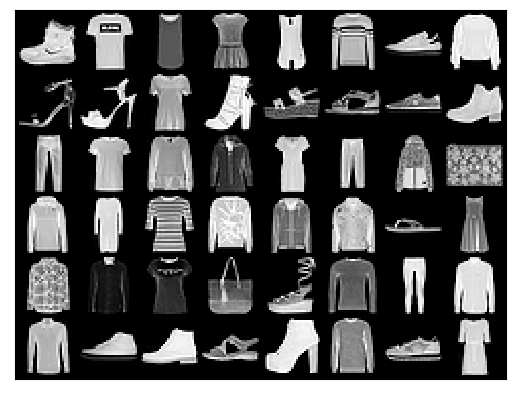

In [8]:
viz = np.reshape(X_train_scaled, (-1, dx1, dx2))
grid = vu.set_grid(viz, num_cells=48)
vu.show(grid)

## Train Autoencoder

In [9]:
print(f"Device: {DEVICE}")

Device: cuda


In [11]:
model = vae.VAE(d_in=dx1*dx2, d_z=dz, d_h=dh).to(DEVICE)
print(model)

# Persistent file to store the model
model_path = os.path.join(MODEL_DIR, 'vae_ep100_fmnist.pth')

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=40, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [15]:
"""Define loss function"""
loss_fn = tu.vae_loss

"""Define optimizer"""
optimizer = optim.Adam(
    model.parameters(), 
    lr=LEARNING_RATE
)

In [16]:
"""Train the Autoencoder"""

for t in range(EPOCHS):
    print(f"Epoch {t+1} out of {EPOCHS}\n ------------")
    
    start = timer.time()
    tu.train_vae(train_dl, model, loss_fn, optimizer, beta=beta)
    elapsed_time = timer.time() - start # this timing method ONLY works for CPU computation, not for GPU/cuda calls
    print(f" > Training time: {elapsed_time:>.2f} seconds")
    
    test_loss = tu.test_vae(test_dl, model, loss_fn, beta=beta)
    print(f" > Test reconstruction loss: {test_loss:>.2f}")
    
    # Save model
    torch.save(model.state_dict(), model_path)
    print(f"Model {model_path} stored!")
    
print("Done!")

Epoch 1 out of 100
 ------------
Loss: 35131.808594 [    0]/60000
Loss: 10091.367188 [25600]/60000
Loss: 8430.609375 [51200]/60000
 > Training time: 4.71 seconds
 > Test reconstruction loss: 7345.25
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 2 out of 100
 ------------
Loss: 8061.278320 [    0]/60000
Loss: 7656.550293 [25600]/60000
Loss: 7210.111816 [51200]/60000
 > Training time: 4.70 seconds
 > Test reconstruction loss: 6448.74
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 3 out of 100
 ------------
Loss: 7247.059570 [    0]/60000
Loss: 7023.743164 [25600]/60000
Loss: 6743.491211 [51200]/60000
 > Training time: 4.62 seconds
 > Test reconstruction loss: 5862.54
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 4 out of 100
 ------------
Loss: 6791.307617 [    0]/60000
Loss: 6645.224121 [25600]/60000
Loss: 6557.359863 [51200]/60000
 > Training time: 4.56 seconds
 > Test reconstruction loss: 5655.72
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 5 out of 100
 ------------
L

Loss: 5633.652344 [25600]/60000
Loss: 5767.249023 [51200]/60000
 > Training time: 4.21 seconds
 > Test reconstruction loss: 4892.52
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 36 out of 100
 ------------
Loss: 5699.639648 [    0]/60000
Loss: 5653.821777 [25600]/60000
Loss: 5768.955078 [51200]/60000
 > Training time: 4.23 seconds
 > Test reconstruction loss: 4815.36
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 37 out of 100
 ------------
Loss: 5703.545410 [    0]/60000
Loss: 5608.479004 [25600]/60000
Loss: 5760.643555 [51200]/60000
 > Training time: 4.32 seconds
 > Test reconstruction loss: 4781.29
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 38 out of 100
 ------------
Loss: 5635.996094 [    0]/60000
Loss: 5550.387207 [25600]/60000
Loss: 5743.661133 [51200]/60000
 > Training time: 4.21 seconds
 > Test reconstruction loss: 4831.56
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 39 out of 100
 ------------
Loss: 5650.019531 [    0]/60000
Loss: 5577.925293 [25600]/60000


Loss: 5492.449707 [25600]/60000
Loss: 5592.624023 [51200]/60000
 > Training time: 4.23 seconds
 > Test reconstruction loss: 4821.23
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 70 out of 100
 ------------
Loss: 5548.507812 [    0]/60000
Loss: 5514.614258 [25600]/60000
Loss: 5680.548340 [51200]/60000
 > Training time: 4.22 seconds
 > Test reconstruction loss: 4730.26
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 71 out of 100
 ------------
Loss: 5578.367188 [    0]/60000
Loss: 5455.820801 [25600]/60000
Loss: 5594.313965 [51200]/60000
 > Training time: 4.21 seconds
 > Test reconstruction loss: 4780.27
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 72 out of 100
 ------------
Loss: 5565.125000 [    0]/60000
Loss: 5472.093750 [25600]/60000
Loss: 5669.346680 [51200]/60000
 > Training time: 4.18 seconds
 > Test reconstruction loss: 4706.14
Model ./models\vae_ep100_fmnist.pth stored!
Epoch 73 out of 100
 ------------
Loss: 5611.574219 [    0]/60000
Loss: 5492.573242 [25600]/60000
